## Importation des librairies et des jeux de données nécessaires à notre travail

In [40]:
import sys
sys.path.insert(0, "/home/apprenant/simplon_project/Brief-Emotion-Analysis-Text")
import pandas as pd
import xgboost as xgb 
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score,auc, roc_curve, roc_auc_score
from src.functions import plot_roc

In [41]:
emotion_final = pd.read_csv("/home/apprenant/simplon_project/Brief-Emotion-Analysis-Text/data/02_cleaned/cleaned_emotion_final.csv")

In [42]:
text_emotion = pd.read_csv("/home/apprenant/simplon_project/Brief-Emotion-Analysis-Text/data/02_cleaned/cleaned_text_emotion.csv")

## Etape 1 : Comparaison de classification du premier jeu de données avec la classification du second jeu de données


### Premier jeu de données

#### Label-encoding des émotions

In [43]:
conditions = [(emotion_final['label'] == "sadness") | (emotion_final['label'] == "fear") | (emotion_final['label'] == "anger"), (emotion_final['label'] == "love") | (emotion_final['label'] == "surprise") | (emotion_final['label'] == "happy")] 

In [44]:
values = [0, 1]

In [45]:
emotion_final['binary_emotion'] = np.select(conditions, values)

#### Choix des variables

In [46]:
X = emotion_final['text']
y = emotion_final['binary_emotion']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

#### Mise en place du modèle

In [47]:
vectorizer = CountVectorizer(min_df=0, lowercase=False)
vectorizer.fit(emotion_final['text'])

CountVectorizer(lowercase=False, min_df=0)

In [48]:
text_train = vectorizer.transform(X_train)
text_test = vectorizer.transform(X_test)

In [49]:

#param = {}
#param['booster'] = 'gbtree'
#param['objective'] = 'binary:logistic'
#param["eval_metric"] = "error"
#param['eta'] = 0.3
#param['gamma'] = 0
#param['max_depth'] = 6
#param['min_child_weight']=1
#param['max_delta_step'] = 0
#param['subsample']= 1
#param['colsample_bytree']=1
#param['silent'] = 1
#param['seed'] = 0
#param['base_score'] = 0.5

In [87]:
xgb_model = xgb.XGBClassifier()
xgb_fit = xgb_model.fit(text_train, y_train)

/home/apprenant/simplon_project/Brief-Emotion-Analysis-Text/env/lib/python3.8/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


XGBoostError: [11:18:39] ../src/data/data.cc:583: Check failed: labels_.Size() == num_row_ (49164 vs. 40000) : Size of labels must equal to number of rows.
Stack trace:
  [bt] (0) /home/apprenant/simplon_project/Brief-Emotion-Analysis-Text/env/lib/python3.8/site-packages/xgboost/lib/libxgboost.so(+0x9133f) [0x7f5b643dc33f]
  [bt] (1) /home/apprenant/simplon_project/Brief-Emotion-Analysis-Text/env/lib/python3.8/site-packages/xgboost/lib/libxgboost.so(+0x110fcc) [0x7f5b6445bfcc]
  [bt] (2) /home/apprenant/simplon_project/Brief-Emotion-Analysis-Text/env/lib/python3.8/site-packages/xgboost/lib/libxgboost.so(+0x1b90e7) [0x7f5b645040e7]
  [bt] (3) /home/apprenant/simplon_project/Brief-Emotion-Analysis-Text/env/lib/python3.8/site-packages/xgboost/lib/libxgboost.so(+0x1b99bc) [0x7f5b645049bc]
  [bt] (4) /home/apprenant/simplon_project/Brief-Emotion-Analysis-Text/env/lib/python3.8/site-packages/xgboost/lib/libxgboost.so(XGBoosterUpdateOneIter+0x50) [0x7f5b643cbed0]
  [bt] (5) /home/apprenant/anaconda3/lib/python3.8/lib-dynload/../../libffi.so.7(+0x69dd) [0x7f5bdd6ff9dd]
  [bt] (6) /home/apprenant/anaconda3/lib/python3.8/lib-dynload/../../libffi.so.7(+0x6067) [0x7f5bdd6ff067]
  [bt] (7) /home/apprenant/anaconda3/lib/python3.8/lib-dynload/_ctypes.cpython-38-x86_64-linux-gnu.so(+0x10da8) [0x7f5bdd715da8]
  [bt] (8) /home/apprenant/anaconda3/lib/python3.8/lib-dynload/_ctypes.cpython-38-x86_64-linux-gnu.so(+0x1108c) [0x7f5bdd71608c]



In [51]:
score = xgb_model.score(text_test, y_test)
print("Accuracy:", round(score, ndigits=4))

Accuracy: 0.9091


In [52]:
y_pred = xgb_fit.predict(text_test)

In [53]:
y_pred

array([0, 0, 1, ..., 1, 1, 0])

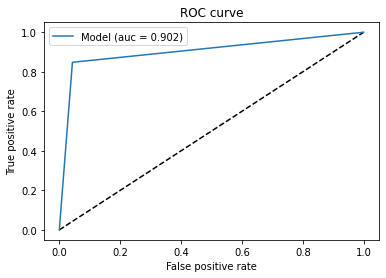

In [54]:
plot_roc(y_test, y_pred)

### Second jeu de données

#### Label encoding des émotions

In [55]:
conditions = [(text_emotion['label'] == "empty") | (text_emotion['label'] == "sadness") | (text_emotion['label'] == "worry") | (text_emotion['label'] == "hate") | (text_emotion['label'] == "boredom") | (text_emotion['label'] == "anger"), (text_emotion['label'] == "enthusiasm") | (text_emotion['label'] == "neutral") | (text_emotion['label'] == "surprise") | (text_emotion['label'] == "love") | (text_emotion['label'] == "fun") | (text_emotion['label'] == "happiness") | (text_emotion['label'] == "relief")] 

In [56]:
values = [0, 1]

In [57]:
text_emotion['binary_emotion'] = np.select(conditions, values)

Choix des variables

In [58]:
X = text_emotion['text']
y = text_emotion['binary_emotion']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

#### Mise en place du modèle

In [59]:
vectorizer = CountVectorizer(min_df=0, lowercase=False)
vectorizer.fit(text_emotion['text'])

CountVectorizer(lowercase=False, min_df=0)

In [60]:
text_train = vectorizer.transform(X_train)
text_test = vectorizer.transform(X_test)

In [61]:
xgb_model = xgb.XGBClassifier()
xgb_fit = xgb_model.fit(text_train, y_train)

/home/apprenant/simplon_project/Brief-Emotion-Analysis-Text/env/lib/python3.8/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
[11:07:42] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [62]:
score = xgb_model.score(text_test, y_test)
print("Accuracy:", round(score, ndigits=4))

Accuracy: 0.7108


In [63]:
y_pred = xgb_fit.predict(text_test)

In [64]:
y_pred

array([1, 1, 0, ..., 1, 1, 1])

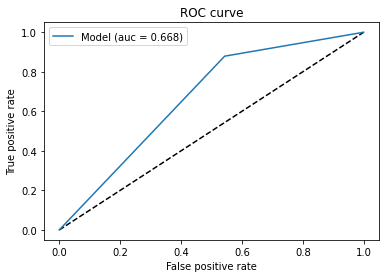

In [65]:
plot_roc(y_test, y_pred)

## Etape 2 : Combiner les deux jeux de données pour améliorer les résultats de prédiction

In [66]:
emotion_final_extracted = emotion_final[['text', 'label']]
text_emotion_extracted = text_emotion[['text', 'label']]
new_emotion_text = pd.concat([emotion_final_extracted, text_emotion_extracted])

In [67]:
new_emotion_text["label"].replace({'happiness': 'happy'}, inplace=True)

### Label encoding des données

In [68]:
conditions = [(new_emotion_text['label'] == "empty") | (new_emotion_text['label'] == "sadness") | (new_emotion_text['label'] == "worry") | (new_emotion_text['label'] == "hate") | (new_emotion_text['label'] == "boredom") | (new_emotion_text['label'] == "anger") | new_emotion_text['label'] == "fear", (new_emotion_text['label'] == "enthusiasm") | (new_emotion_text['label'] == "neutral") | (new_emotion_text['label'] == "surprise") | (new_emotion_text['label'] == "love") | (new_emotion_text['label'] == "fun") | (new_emotion_text['label'] == "happy") | (new_emotion_text['label'] == "relief")] 

In [69]:
values = [0, 1]

In [70]:
new_emotion_text['binary_emotion'] = np.select(conditions, values)

### Choix des variables

In [71]:
X = new_emotion_text['text']
y = new_emotion_text['binary_emotion']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

### Mise en place du modèle

In [72]:
vectorizer = CountVectorizer(min_df=0, lowercase=False)
vectorizer.fit(new_emotion_text['text'])

CountVectorizer(lowercase=False, min_df=0)

In [73]:
text_train = vectorizer.transform(X_train)
text_test = vectorizer.transform(X_test)

In [74]:
xgb_model = xgb.XGBClassifier()
xgb_fit = xgb_model.fit(text_train, y_train)

/home/apprenant/simplon_project/Brief-Emotion-Analysis-Text/env/lib/python3.8/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
[11:07:49] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [75]:
score = xgb_model.score(text_test, y_test)
print("Accuracy:", round(score, ndigits=4))

Accuracy: 0.7476


In [76]:
y_pred = xgb_fit.predict(text_test)

In [77]:
y_pred

array([1, 1, 1, ..., 1, 1, 1])

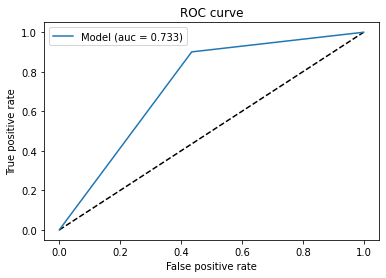

In [78]:
plot_roc(y_test, y_pred)

## Etape 3 : Utiliser les nouvelles émotions du jeu de données 2 et les prédire sur les messages du jeu 1

In [79]:
X = text_emotion['text']
y = text_emotion['binary_emotion']
X_test = emotion_final['text']
y_test = emotion_final['binary_emotion']

In [80]:
vectorizer = CountVectorizer(min_df=0, lowercase=False)
vectorizer.fit(X)
vectorizer.fit(X_test)

CountVectorizer(lowercase=False, min_df=0)

In [81]:
text_train = vectorizer.transform(X)
text_test = vectorizer.transform(X_test)

In [83]:
xgb_model = xgb.XGBClassifier()
xgb_fit = xgb_model.fit(text_train, y)

[11:10:21] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [84]:
y_pred = xgb_fit.predict(text_test)

In [86]:
score = xgb_model.score(text_test, y_test)
print("Accuracy:", round(score, ndigits=4))

Accuracy: 0.579


In [85]:
y_pred

array([0, 0, 0, ..., 1, 1, 0])